In [14]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [15]:
# Set a seed for reproducibility
np.random.seed(123)

# Load the data
data = pd.read_csv("/kaggle/input/heart-prediction-dataset-quantum/Heart Prediction Quantum Dataset.csv")

# Display the first few rows of the dataframe
print(data.head())

# Get the structure of the data
print(data.info())

# Check for missing values
print(data.isnull().sum())

   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int

In [16]:
# Convert categorical variables to factors/categories
data['Gender'] = data['Gender'].astype('category')
data['HeartDisease'] = data['HeartDisease'].astype('category')

# Display summary statistics
print(data.describe())

              Age  BloodPressure  Cholesterol   HeartRate  \
count  500.000000     500.000000    500.00000  500.000000   
mean    54.864000     132.874000    221.50000   88.766000   
std     14.315004      26.418516     43.86363   17.417289   
min     30.000000      90.000000    150.00000   60.000000   
25%     43.000000     111.000000    183.75000   73.000000   
50%     55.000000     132.000000    221.00000   89.000000   
75%     66.250000     155.000000    258.00000  104.000000   
max     79.000000     179.000000    299.00000  119.000000   

       QuantumPatternFeature  
count             500.000000  
mean                8.317407  
std                 0.919629  
min                 6.164692  
25%                 7.675779  
50%                 8.323064  
75%                 8.935999  
max                10.784886  


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

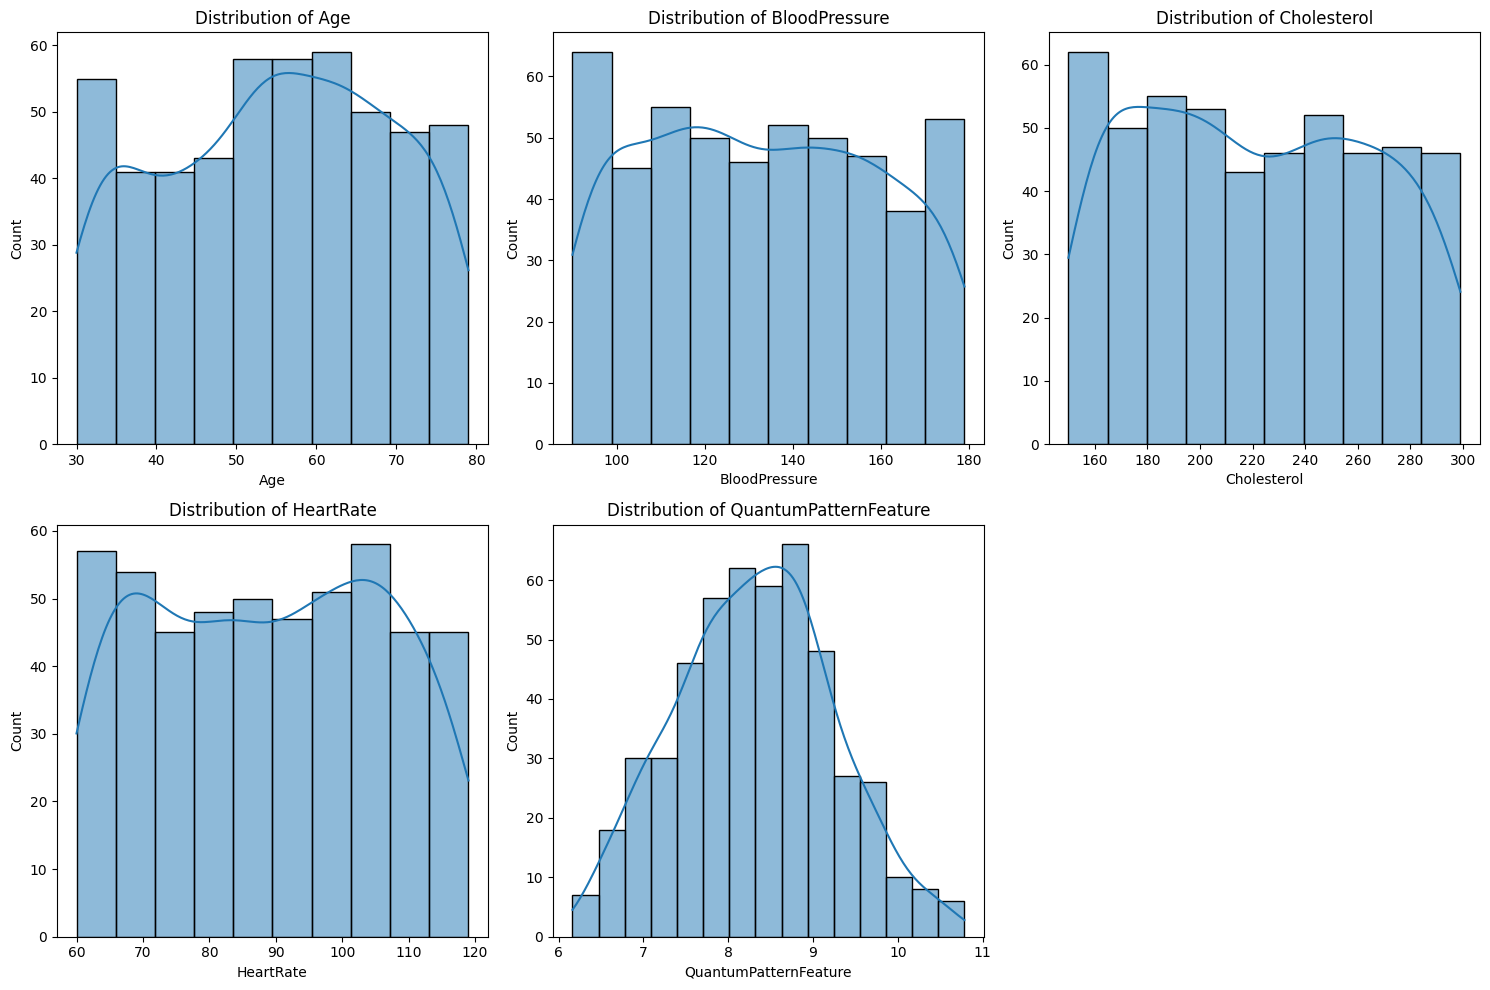

In [17]:
# distributions of numerical features
numerical_features = ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

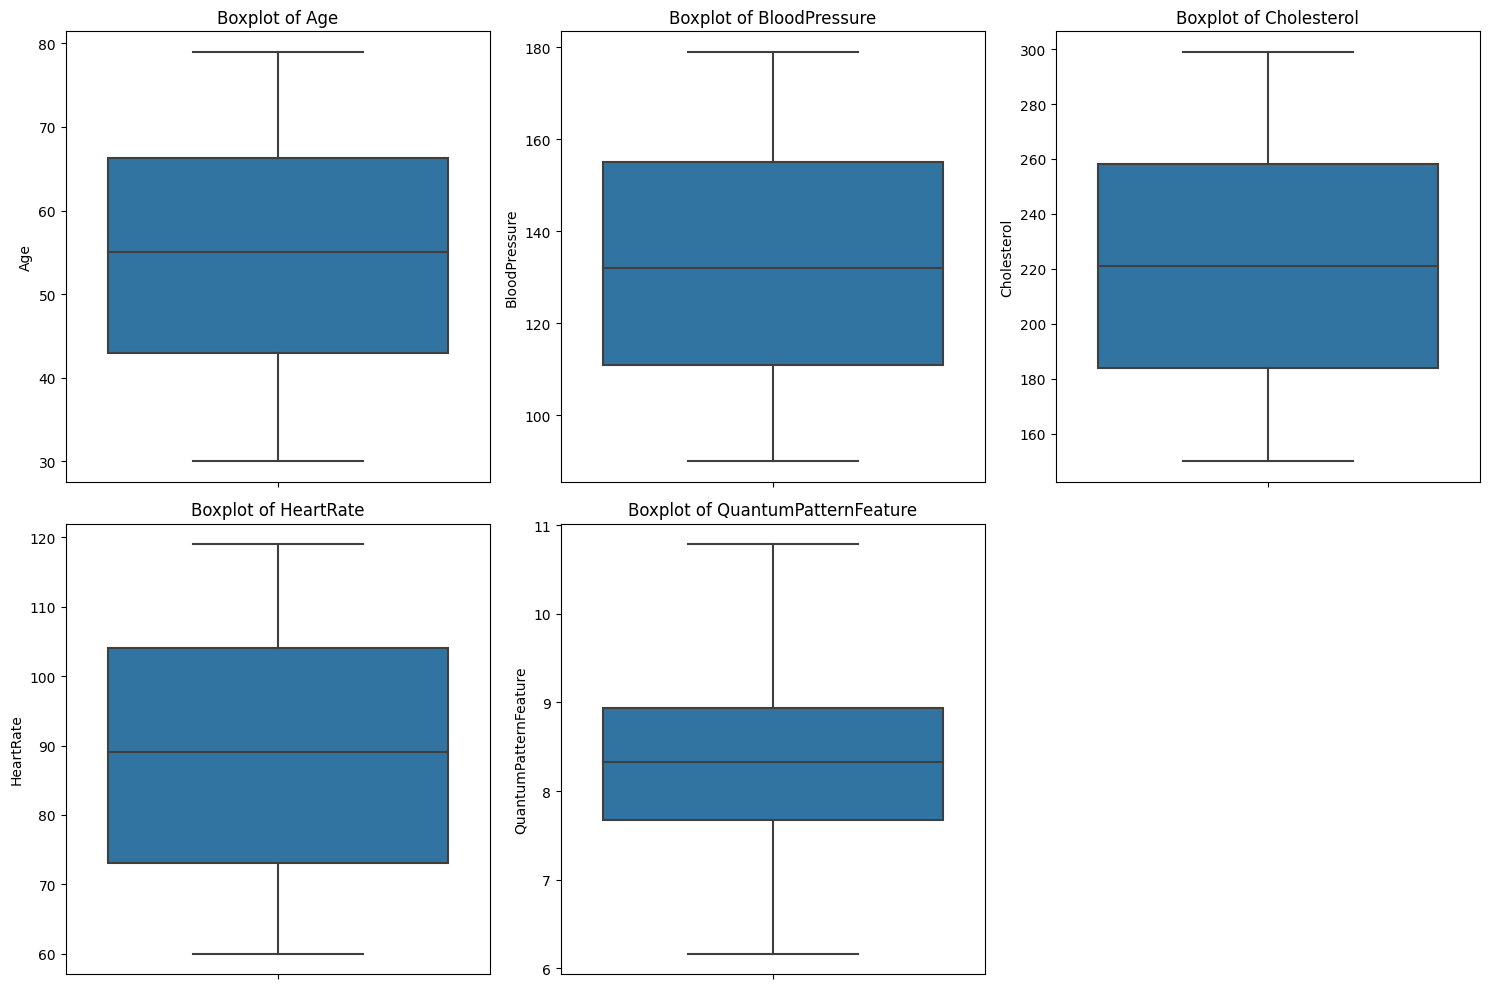

In [18]:
# boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [19]:
# Handle outliers in Cholesterol using IQR method
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Cholesterol'] >= lower_bound) & (data['Cholesterol'] <= upper_bound)]

# Scale numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the processed data
print(data.head())

        Age Gender  BloodPressure  Cholesterol  HeartRate  \
0  0.918558      1      -1.056150    -0.696033   1.047939   
1  0.219290      0      -1.359271     0.627571   0.013448   
2 -0.759684      0      -1.510832    -0.718854  -0.388854   
3  1.198265      1      -1.510832    -0.878599   0.703109   
4 -1.249171      0       0.459456    -1.266552   0.818052   

   QuantumPatternFeature HeartDisease  
0               0.048800            1  
1               1.014025            0  
2              -0.408035            1  
3              -1.983493            1  
4              -0.722217            1  


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


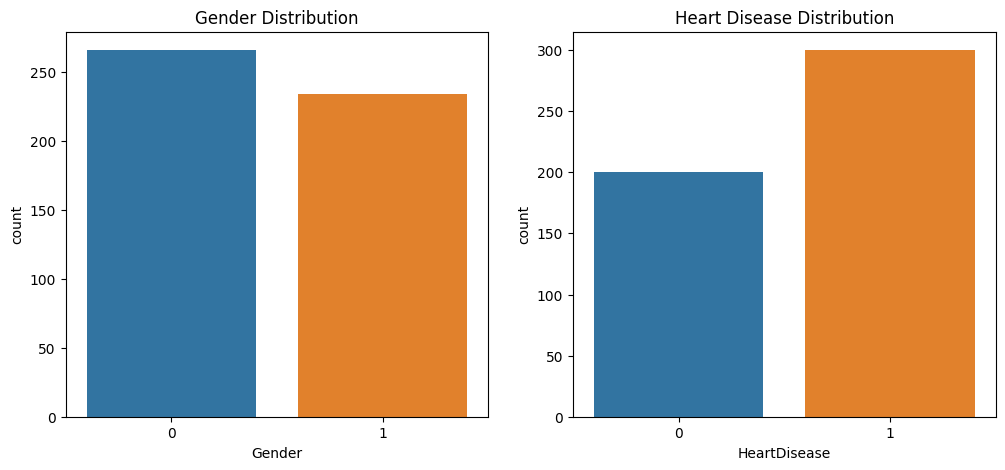

In [20]:
# categorical feature distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='HeartDisease', data=data)
plt.title('Heart Disease Distribution')
plt.show()


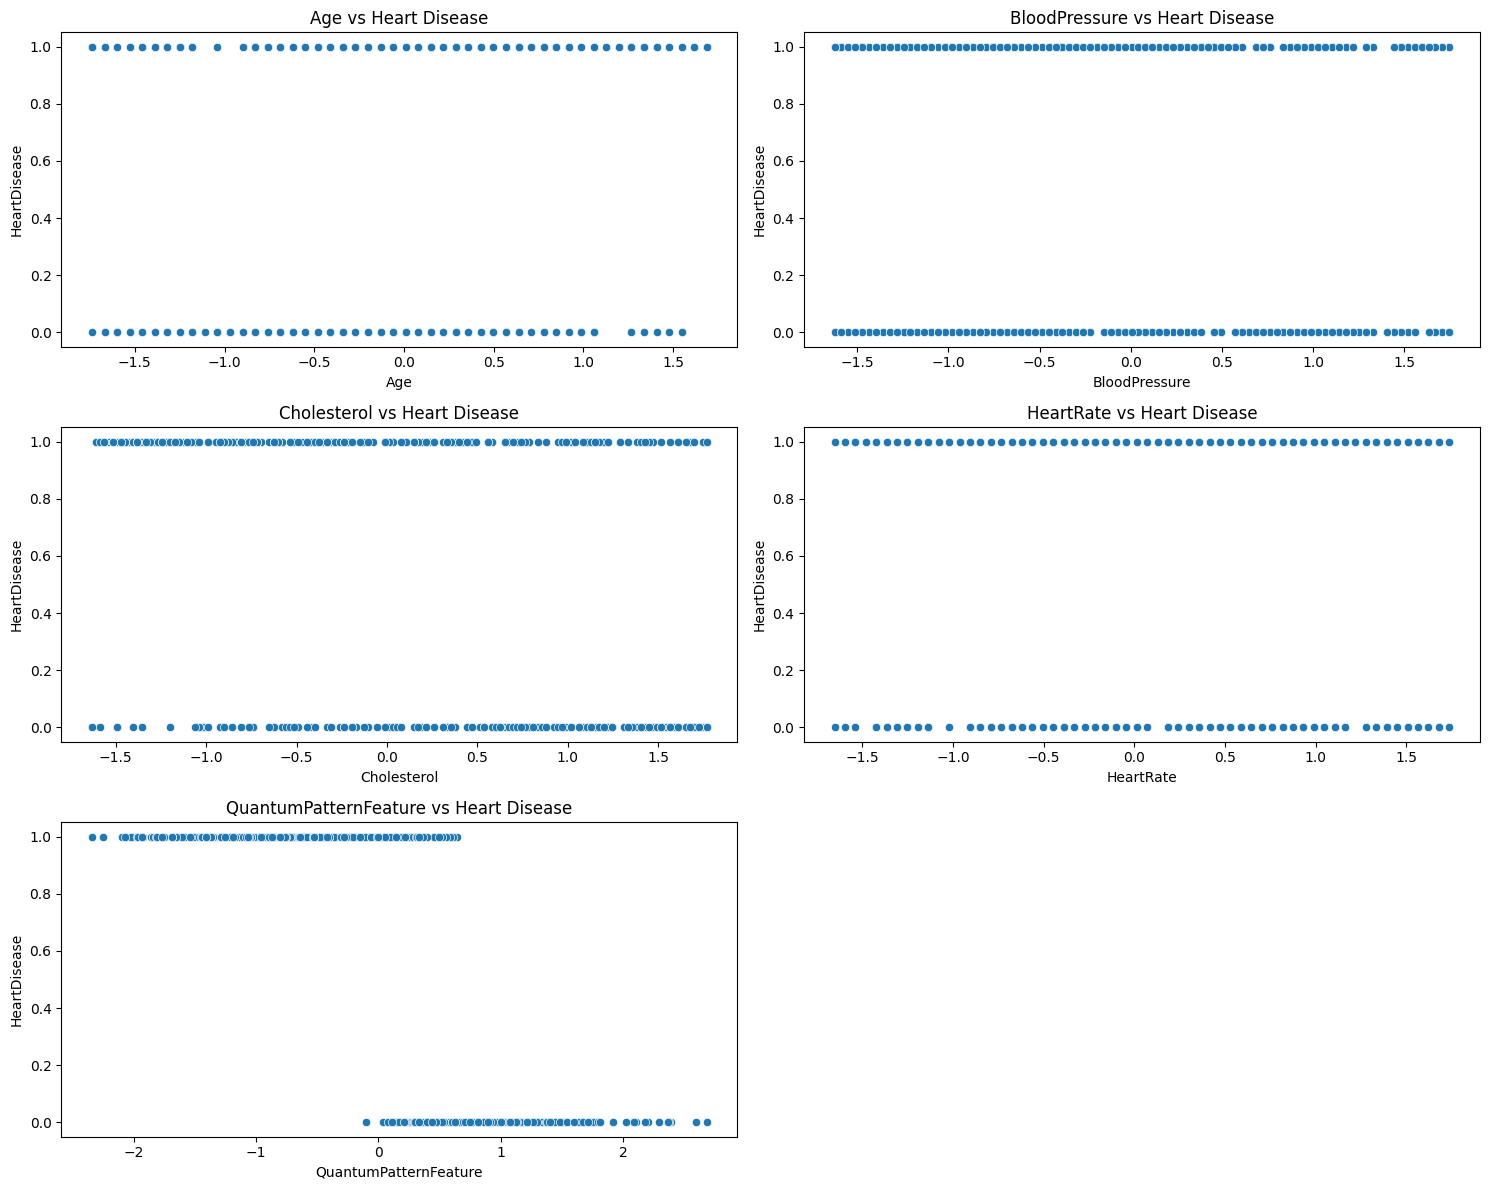

In [21]:
# relationships between features and target variable
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=data[feature], y=data['HeartDisease'].astype(int))
    plt.title(f'{feature} vs Heart Disease')
plt.tight_layout()
plt.show()


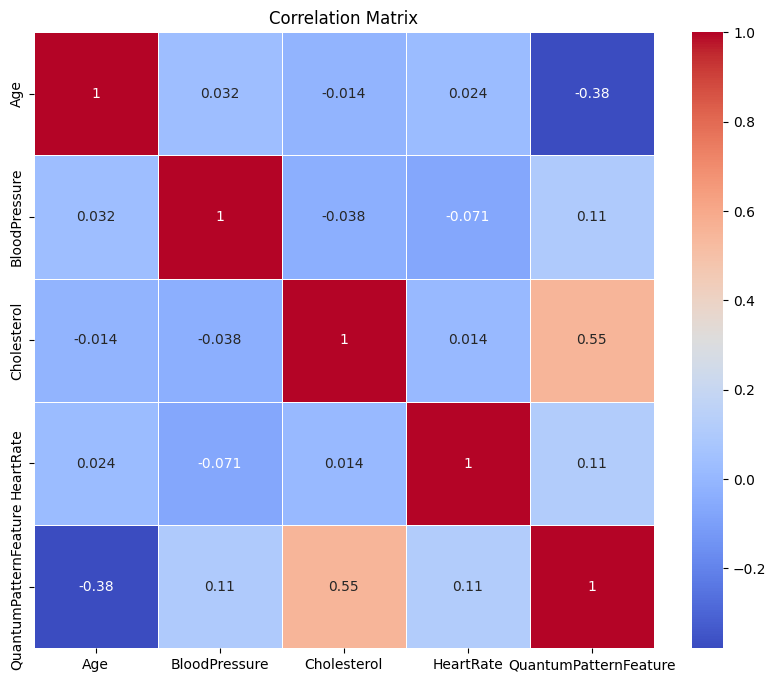

In [22]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [23]:
# Split the data into training and testing sets
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Train a logistic regression model
model = LogisticRegression(random_state=123)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

In [24]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nAccuracy Score:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[59  5]
 [ 9 77]]

Accuracy Score: 0.9066666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        64
           1       0.94      0.90      0.92        86

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

